In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

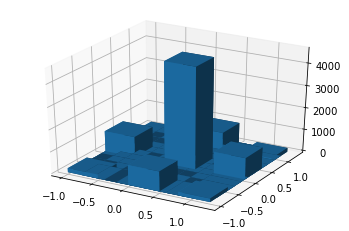

In [14]:
N = 100000
MEAN = 0.0
VAR = 1.0
RANGE = 1
BINS = 10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sumpled = (np.random.normal(MEAN, VAR, (10000, 2))).astype(np.int)
hist, xedges, yedges = np.histogram2d(sumpled[:, 0], sumpled[:, 1], bins=BINS, range=[[-RANGE, RANGE], [-RANGE, RANGE]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

# plt.hist(sumpled, 50, density=True)
fig.savefig("normal_sumpled.png")

In [15]:
lin = np.linspace(-RANGE, RANGE, BINS)

X = 0
p = 0
x_sumpled = sumpled[sumpled[:, 0] == X]
for ind in range(-RANGE, RANGE + 1):
     p += sum(x_sumpled[:, 1] == ind) / N   

print(f"X: {X} の周りでの周辺化 => probability: {p}")

X: 0 の周りでの周辺化 => probability: 0.06428


In [31]:
X = 0
Y = 0
p = 0
x_sumpled = sumpled[sumpled[:, 0] == X]
y_sumpled = sumpled[sumpled[:, 1] == Y]
x_y_sumpled = y_sumpled[y_sumpled[:, 0] == X]

print(f"乗法定理によるp(x): X: {X}, Y: {Y} => {(len(y_sumpled) / N) * (len(x_y_sumpled) / len(y_sumpled))}")

乗法定理によるp(x): X: 0, Y: 0 => 0.047369999999999995


In [59]:
org_csv = pd.read_csv("csv/dere_profil .csv", header=0)

In [60]:
df = pd.DataFrame(columns=org_csv.columns)
for index, row in org_csv.iterrows():
    try:
        to_int_labels = ["B", "W", "H", "height", "weight", "age"]
        for label in to_int_labels:
            tmp = row[label].strip("cm")
            tmp = tmp.strip("kg")
            row[label] = int(tmp)
    except:
        print(f"Error: {row['l_name_y']}")
        continue
    
    df = df.append(row)

int_labels = ["B", "W", "H", "height", "weight", "age"]
for label in int_labels:
    df[label] = df[label].astype('int32')

Error: あべ
Error: おおぬま
Error: さとう
Error: ふたば


In [61]:
SEP = 5
df[int_labels] = df[int_labels] // SEP


In [46]:
SEARCH_RANGE = 31

type_list = ["Cu", "Cute", "Co", "Cool", "Pa", "Passion"]

height_filtered = df[df['height'] == SEARCH_RANGE]

p = 0
for ind in range(len(type_list) // 2):
    type_filtered = df[df["type"] == type_list[2 * ind]]
    type_height_filtered = height_filtered[height_filtered["type"] == type_list[2 * ind]]
    heightp_intype = len(type_height_filtered) / len(type_filtered)
    type_p = len(type_filtered) / len(df)
    p += type_p * heightp_intype
    print(f"{type_list[2 * ind + 1]} : selected p only in the type: {heightp_intype}")
    
print(f"all probability using addition: {p}")
print(f'all probability: {len(height_filtered) / len(df)}')



Cute : selected p only in the type: 0.2923076923076923
Cool : selected p only in the type: 0.15942028985507245
Passion : selected p only in the type: 0.2857142857142857
all probability using addition: 0.24365482233502536
all probability: 0.2436548223350254


In [68]:
df.groupby(["type"])["B"].value_counts(sort=False)


type  B 
Co    12     1
      13     2
      14     6
      15    10
      16    25
      17    17
      18     8
Cu    12     3
      14     6
      15    21
      16    22
      17     8
      18     5
Pa    12     1
      13     1
      14     8
      15    12
      16    25
      17    10
      18     4
      19     1
      21     1
Name: B, dtype: int64